In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('D2.csv')
print(df.info())
# print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5789 non-null   object 
 1   age               5789 non-null   object 
 2   height            5789 non-null   int64  
 3   weight            5789 non-null   int64  
 4   blood_type        5789 non-null   object 
 5   insurance         5789 non-null   object 
 6   income            5789 non-null   object 
 7   smoking           5789 non-null   object 
 8   alcohol           5789 non-null   float64
 9   contacts_count    5789 non-null   float64
 10  working           5789 non-null   object 
 11  worried           5789 non-null   float64
 12  covid19_positive  5789 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 588.1+ KB
None


# Tesk - Decision 🌲

## Task 1
What pre-processing was required on the dataset (D2.csv) before decision tree modelling? What distribution split between training and test datasets was used?

1. Cleaning data (outliers, noisy data, and missing data)
1. Data selection including unary data, redundant data (refer to the same information), or derived variable.
    - drop target variable. "covid19_positive" in our case.
1. Data partition: seperate training data, validation data, and testing data. We will apply k-fold* cross validation to partition our data in task 2 😉

*k-fold does not require validation dataset.


In [4]:
from sklearn.model_selection import train_test_split
def data_prep(df):
    y = df['covid19_positive']
    
    df.drop(['covid19_positive'], axis=1, inplace=True)    
    X = pd.get_dummies(df) # one 🥵 encoding
    
    X_mat = X.to_numpy()

    # setting random state
    rs = 30678

    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
    return df,X,y,X_train, X_test, y_train, y_test

df,X,y,X_train, X_test, y_train, y_test = data_prep(df)

## Task 2 Build a decision tree using the default setting. 

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

rs = 30678
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

# print model parameters
print(model.get_params(deep = True))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 30678, 'splitter': 'best'}


### Task 2-a. What is the classification accuracy of training and test datasets?

In [6]:
print("Train accuracy:", model.score(X_train, y_train))

Train accuracy: 0.9997532082922014


In [7]:
print("test accuracy:", model.score(X_test, y_test))

test accuracy: 0.6378814047207829


Training accuracy: 99.98%
</br>Testing accuracy: 63.78%

overfitting lol 💥


### Task 2-b. What is the size of the tree (number of nodes and rules)?

In [8]:
# nodes
model.tree_.node_count

2013

In [9]:
# rules
model.tree_.n_leaves

1007


### Task 2-c. Which variable is used for the first split?

In [10]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())

# Save the graph as PNG
graph.write_png("dt_viz.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.860659 to fit



True

![tree](./dt_viz.png)

In [11]:
index_of_first_split = model.tree_.feature[0]
X.columns[index_of_first_split]

'income_high'

👉🏻 Answer: **income**, to be more specific is "**income_high**", which is a newly created variable by one 🥵 encoding


### Task 2-d. What are the 5 important variables (in the order) in building the tree?

In [12]:
import numpy as np

# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

weight : 0.13700867538445535
height : 0.1331902551677578
contacts_count : 0.11039669670381139
income_high : 0.0999957123864951
alcohol : 0.06971959541167622
worried : 0.06526931664486157
age_30_40 : 0.018848958740875093
blood_type_unknown : 0.017521180629568586
smoking_never : 0.01750152238035142
blood_type_ap : 0.0172814506302635
working_stopped : 0.01632039939062308
age_70_80 : 0.015946894609907537
smoking_quit10 : 0.015924952663171798
working_travel non critical : 0.015762799196433728
gender_male : 0.014964839585900402
insurance_yes : 0.014477899805585946
age_10_20 : 0.014139517786837084
age_60_70 : 0.013891091264524
blood_type_bp : 0.013713345250628284
blood_type_op : 0.013486559815343593


👉🏻Answer: </br>
The first five most important variables are:
- weight : 0.13700867538445535
- height : 0.1331902551677578
- contacts_count : 0.11039669670381139
- income_high : 0.0999957123864951
- alcohol : 0.06971959541167622


They are the five most effective variebles when it comes to splitting.


### Task 2-e. What parameters have been used in building the tree? Detail them

In [13]:
params = model.get_params()

print("Parameters used in building the tree:")
for param, value in params.items():
    print(f"{param}: {value}")

Parameters used in building the tree:
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 30678
splitter: best


## Task 3 Build another decision tree fine-tuned with GridSearchCV. Answer the followings:

In [14]:
from sklearn.model_selection import GridSearchCV

# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train) 

result_set = cv_1.cv_results_
print(result_set)


{'mean_fit_time': array([0.00883062, 0.00786948, 0.00726442, 0.00741556, 0.00906227,
       0.009285  , 0.0106292 , 0.01765602, 0.01198146, 0.01060917,
       0.0103066 , 0.01121106, 0.01226273, 0.01242132, 0.01200345,
       0.01176832, 0.01416485, 0.01491468, 0.01361818, 0.01427157,
       0.01608899, 0.02098448, 0.01435463, 0.01545882, 0.01616828,
       0.01584439, 0.01533945, 0.01515975, 0.0176559 , 0.01690526,
       0.01650367, 0.01606975, 0.01813068, 0.01874948, 0.01738284,
       0.0173584 , 0.02142935, 0.01824362, 0.01773286, 0.01716518,
       0.01964517, 0.0188508 , 0.02312829, 0.02882504, 0.028233  ,
       0.02311673, 0.02062242, 0.01872861, 0.02208517, 0.02140651,
       0.02049541, 0.02305806, 0.04167125, 0.02455795, 0.02495148,
       0.02246044, 0.02421882, 0.02107587, 0.01973603, 0.01892335,
       0.00756705, 0.00765901, 0.0081769 , 0.00795248, 0.01079745,
       0.00904295, 0.00891602, 0.00968294, 0.0110158 , 0.0114393 ,
       0.011079  , 0.01091831, 0.01259179, 0

In [15]:
# find the best 🥇

print(cv_1.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 20}



### Task 3-a. What is the classification accuracy of training and test datasets?

In [16]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.7342053307008884
Test accuracy: 0.7058146229130685



### Task 3-b. What is the size of the tree (i.e. the number of nodes and rules)?

In [17]:
optimal_model = cv_1.best_estimator_

In [18]:
optimal_model.tree_.node_count

143

In [19]:
# ruless
optimal_model.tree_.n_leaves

72


### Task 3-c. Which variable is used for the first split?

In [20]:
index_of_first_split = optimal_model.tree_.feature[0]
X.columns[index_of_first_split]

'income_high'

👉🏻 Answer: **income high** still ! 😎


### Task 3-d. What are the 5 important variables (in the order) in building the tree?

In [21]:
# grab feature importances from the model and feature name from the original X
importances = optimal_model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:5]

for i in indices:
    print(feature_names[i], ':', importances[i])

income_high : 0.3555254289764614
worried : 0.17058832010549724
contacts_count : 0.11639389957741678
weight : 0.069075079563171
insurance_no : 0.03432621115864898



### Task 3-e. Report if you see any sign of model overfitting.

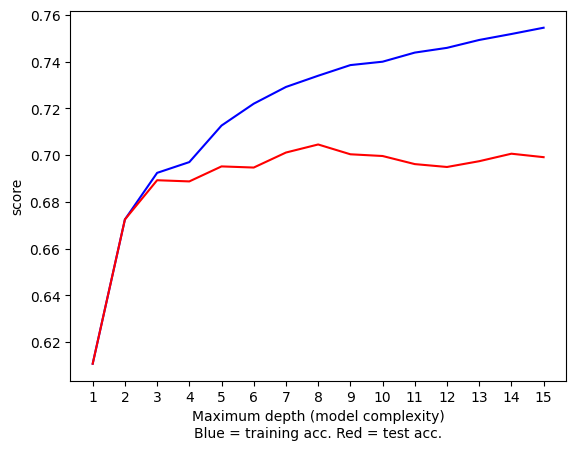

In [22]:
# result_set: refer to the best result from the 

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []

dd = pd.DataFrame(result_set['params'])
index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==20)])
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

We plot this graph to show the model accuracy as the tree grows. The plot indicates that as the tree grows deeper, the model is more likely to overfit. Before reaching the maximun depth of 3, the model is learning good patterns and relationships from the data. However, starting from maximun depth of 4 (until 15), the training accuracy increases gradually to over 75% while the testing accuracy remains stable at around 70%. This pattern suggests clear signs of model overfitting.

## Task 4
What differences do you observe between these two decision tree models (with and without fine-tuning)? How do they compare performance-wise? Produce the ROC curve for both decision trees. Explain why those changes may have happened.

In [23]:
# calcuate ROC scores
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = optimal_model.predict_proba(X_test)
roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])
print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.6224147522293029
ROC index on test for DT_optimal: 0.7362124708772354


From the given ROC scores*, the optimal model's score is higher than the default model's score, indicating that the optimal model has the better performance. 

*The higher the ROC score is, the better the model can discriminate between positive and negative instances. 

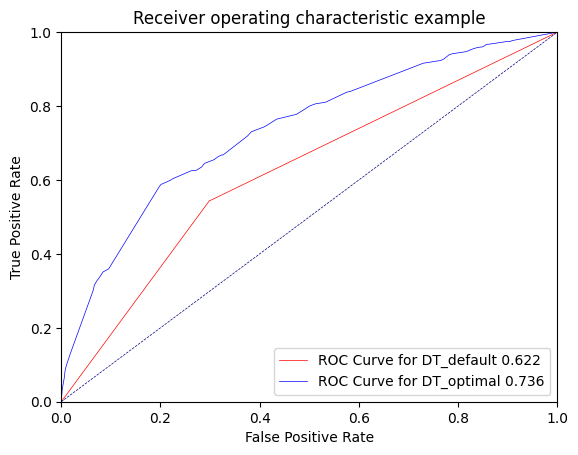

In [24]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The curve the for optimal model (blue colour) shows the larger curve area compared to that of the default one. Hence, it is the better performing model.

## Task 5
Using the better model, can you identify which individuals could potentially be "COVID positive"? Also, provide the general characteristics of those individuals

In [25]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(optimal_model, out_file=dotfile, feature_names=X.columns, class_names=True, filled=True)
graph = pydot.graph_from_dot_data(dotfile.getvalue())

# # Save the graph as PNG
graph.write_png("optimal_tree_colour.png")

True

![optimal tree](./optimal_tree_colour.png)

🚨 Answer: </br>
The general characteristics for individuals who got covid positive.

- weight <= 77 kg
- 165 cm > height <= 173 cm

hopefully it is not real 😆

## Save pickle 🥒 

In [27]:
import pickle
dt_best = cv_1
with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)